# Введение
## Классические временные ряды
В основном данные синхронны, с одинаковым лагом.

Данные могут быть представлены в виде последовательности значений $\{\mathbf{x}_i\}_{i=1}^N$I с заданным временным лагом $\Delta t$.

## Последовательности событий
Данные асинхронны, неодинаково запаздывают.

Данные могут быть представлены в виде последовательности пар $\{(t_i,c_i)\}_{i=1}^N$, временной лаг предусмотреть нельзя и нужно учитывать время возникновения.

### Точечный процесс

Точечный процесс — это набор математических точек, случайно расположенных в математическом пространстве.

Temporal Point Process — это точечный процесс на временной шкале.

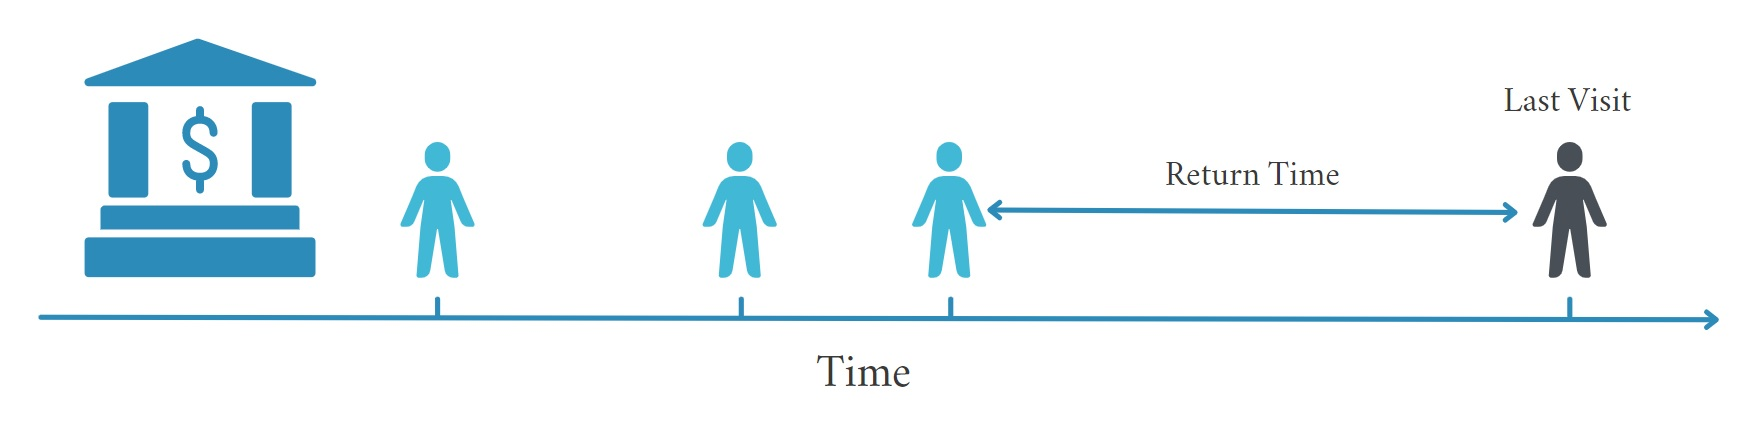

Действительно, реализация временного точечного процесса представляет собой последовательность событий $\mathbf{s} = \{(t_i,c_i)\}_{i=1}^N$. Где $t_i$ - момент времени, когда событие произошло и $c_i\in\mathcal{C}$ тип события.

Одним из наиболее распространенных способов описания временных точечных процессов является использование функции интенсивности.

$$
\lambda_c(t|\mathcal{H}_t^{\mathcal{C}}) = \frac{\mathbb{E}[dN_c(t|\mathcal{H}_t^{\mathcal{C}})]}{dt}
$$

Эта интенсивность показывает вероятность того, что событие типа $c$ произойдет в полуинтервале $[t;t+dt)$. $N_c(t)$ — счетная функция, показывающая номер события до момента времени $t$.

# Точечный процесс Пуассона

Poisson Point Process — простейший из точечных процессов, который мы можем рассмотреть. В случае процесса Пуассона мы предполагаем, что функция интенсивности не зависит от истории.

$$
\lambda_c(t|\mathcal{H}_{t}^{\mathcal{C}}) = \lambda_c(t)
$$

Мы можем рассматривать **однородный** и **негомогенный** процесс Пуассона. В первом случае мы предполагаем, что зависимости от времени нет и $\lambda(t) = \lambda$.

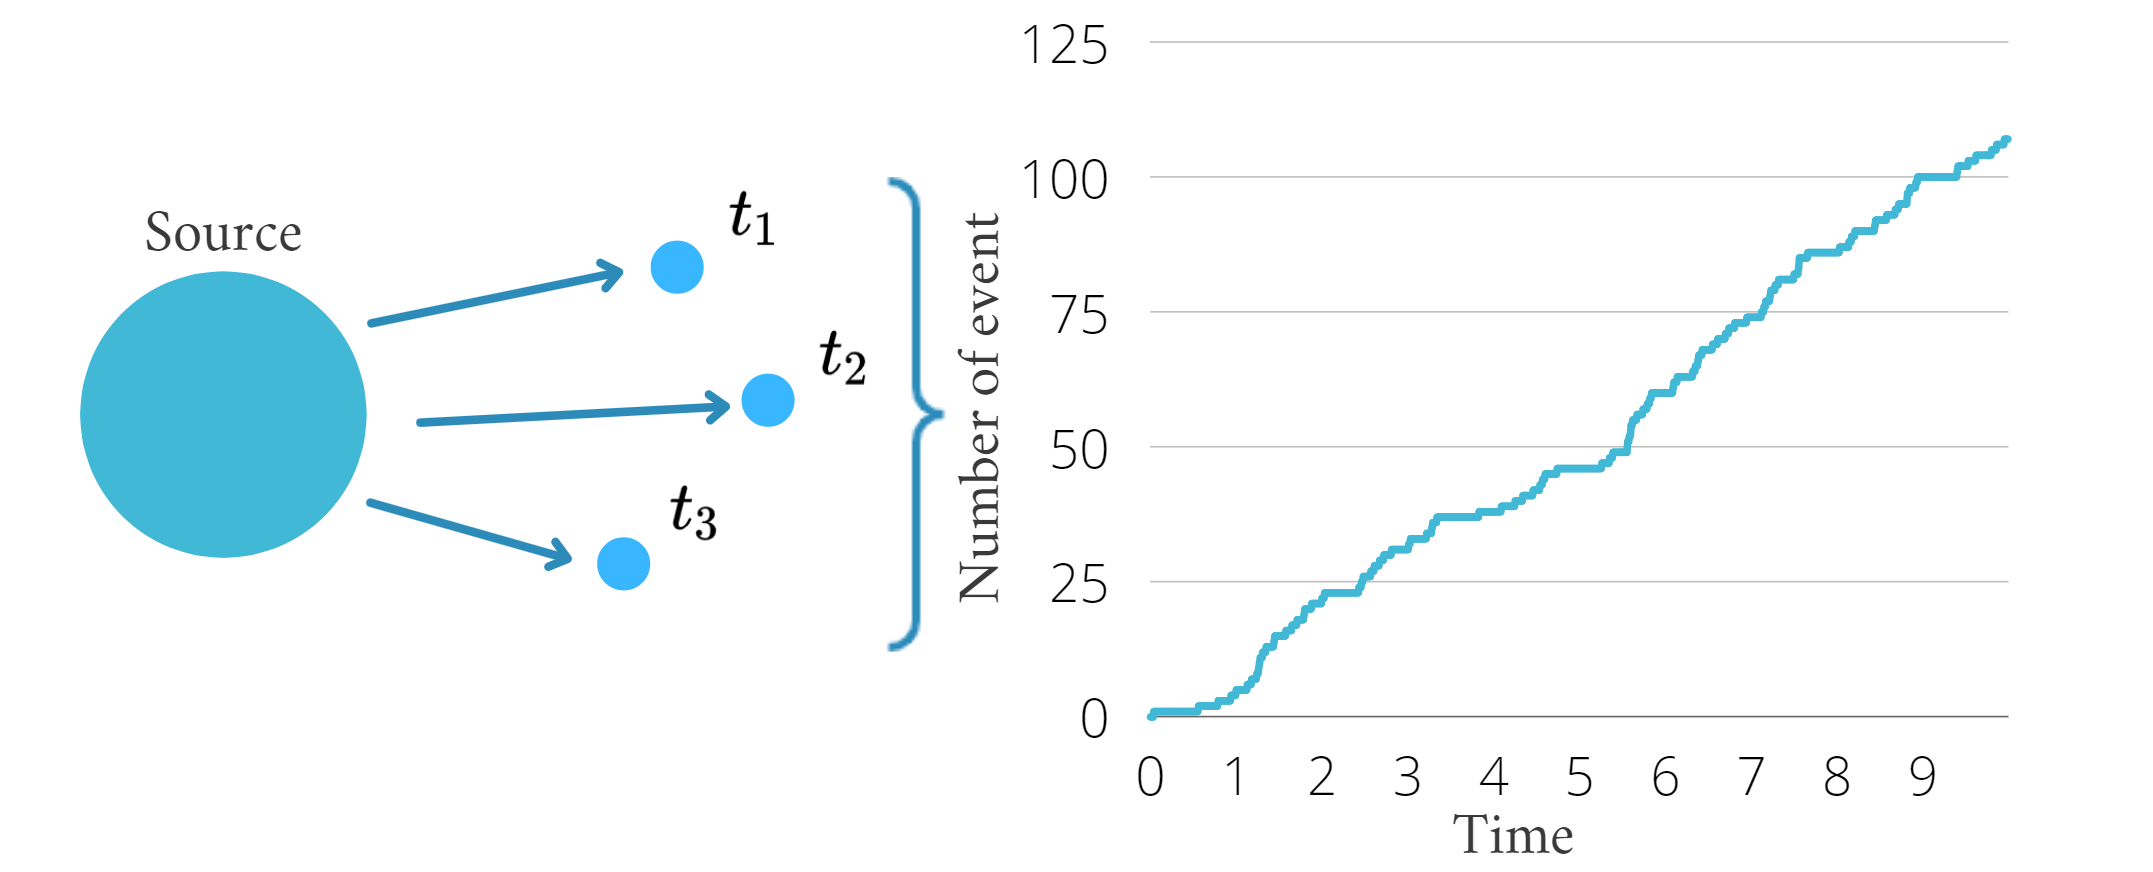

Угловой коэффициент счетной функции равен интенсивности. Мы проверим этот факт позже в экспериментах.

## Примеры

### Вопрос: Можете ли вы подумать о каких-либо реальных проблемах, которые можно решить с помощью моделирования процесса Пуассона?

- Поток космических частиц
- Очередь (например, количество обслуженных людей)
- Количество автомобилей, проезжающих через перекресток

### Очередь

#### Вопрос: Предположим, что у нас есть касса и очередь. Мы можем описать это как два точечных процесса - приходящие люди и обслуженные люди. Какой процесс мы можем описать как процесс Пуассона?

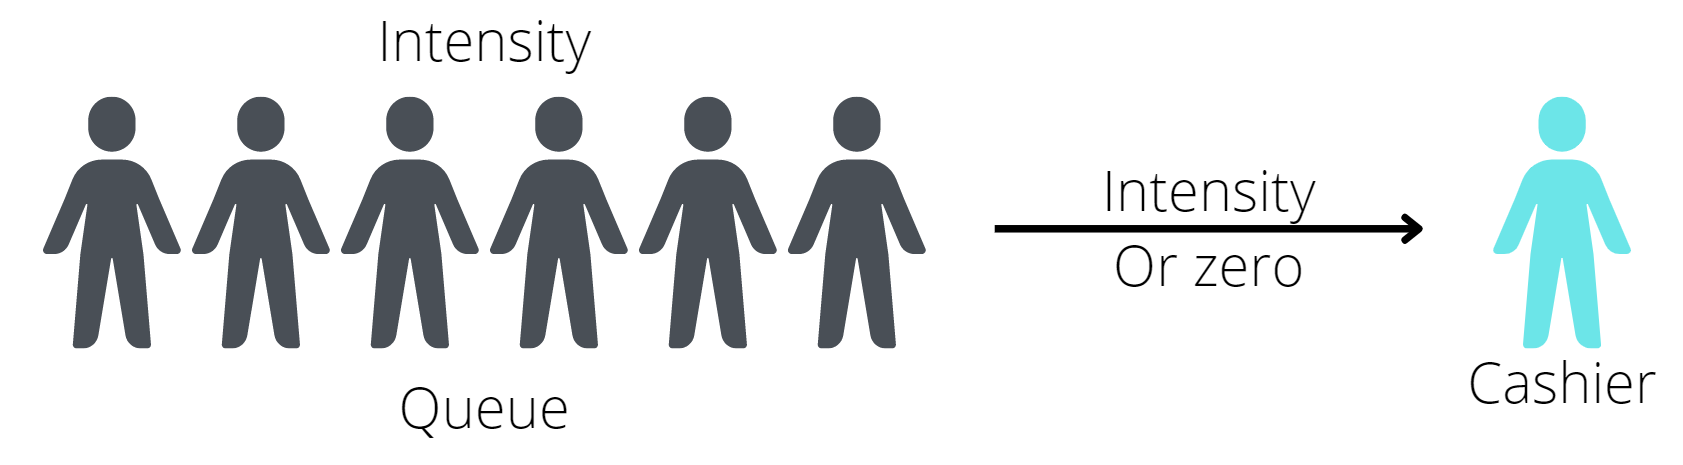

Входящие люди могут быть описаны интенсивностью пуассоновского процесса. Можно подумать, что мы можем определить и интенсивность обслуживаемых людей. Однако что произойдет, если в очереди нет людей. В этом случае у нас не может быть новых обслуживаемых людей.

Таким образом, мы можем описать эту модель следующим образом.
$$
\lambda_q(t)\text{ - интенсивность очереди}
$$
$$
\lambda_c(t|очередь) = \lambda_c(t)\times\left(\# [очередь]>0\right)
$$

Однако локально оба процесса можно описать как пуассоновские.

### Пример поломки машины

Предположим, что у нас есть несколько машин. Мы можем попытаться предсказать их поломки, используя пуассоновские процессы.

Одной из моделей, которые можно использовать, является модель пропорциональных рисков Кокса.

$$
\lambda_{PH} = \lambda_0(t)\exp(-\boldsymbol{x}^{\top}\boldsymbol{\beta})
$$

Здесь нам нужна дополнительная информация, например, машина измеряет рекорды. Однако, если у нас нет дополнительной информации, мы можем попробовать использовать процесс Пуассона в качестве первого приближения.

### Выводы из примеров

- В основном зависимости последовательностей событий более сложны, чем простой процесс Пуассона
- Процесс Пуассона является хорошим первым приближением
- Локально многие проблемы могут быть смоделированы с помощью модели процесса Пуассона

# Теоретические задачи

### Распределение Пуассона

#### Вопрос: Что такое распределение Пуассона?

#### Вопрос: Как распределение Пуассона связано с процессом Пуассона?

Счетная функция процесса Пуассона может быть описана с помощью распределения Пуассона.

Рассмотрим однородный процесс Пуассона с функцией интенсивности $\lambda(t) = \lambda$. В таком случае:

$$
p (N (t) = k) = \frac {(\lambda t) ^ k e ^ {- \lambda t}} {k!}
$$



### Функции обработки точек

#### Вопрос: Какие функции можно использовать для описания точечных процессов?

- Функция интенсивности
- Функция плотности вероятности
- Функция выживания

# Генерация однородного процесса

#### Задача: сгенерируйте последовательность гомогенного процесса Пуассона, используя ```torch.rand``` и `torch.poisson`.

In [ ]:
import torch
import torch.nn as nn
torch.random.manual_seed(12)

# code here

T = 10
lambda_ = 10
poisson_lambda = lambda_ * T

N = torch.poisson(torch.Tensor([poisson_lambda])).long()[0]
seq, _ = torch.sort(torch.rand((N,)) * T)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6), dpi=80)
plt.vlines(x=seq, ymin=0, ymax=10, label = 'Sequence')
plt.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1,1))
plt.xlabel("time", fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
times = torch.arange(0,10,0.01)
counts = torch.Tensor([torch.sum(seq<=t) for t in times])
expected = lambda_ * times

plt.figure(figsize=(9, 6), dpi=80)
plt.plot(times, counts, label = 'Sequence')
plt.plot(times, expected, label = 'Expectation')
plt.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1,1))
plt.xlabel("time", fontsize=16)
plt.ylabel("counts", fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Эмпирические эксперименты по распределению гомогенного процесса Пуассона

#### Задача: построить график эмпирической PDF в сравнении с истинной PDF

In [ ]:
# let's generate sequence
T = 10000
lambda_ = 10
poisson_lambda = lambda_ * T

N = torch.poisson(torch.Tensor([poisson_lambda])).long()[0]
seq, _ = torch.sort(torch.rand((N,)) * T)

In [ ]:
# let's compute return time
return_time = seq[1:] - seq[:-1]

In [ ]:
times = torch.arange(0,1.5,0.01)
pdf = lambda_*torch.exp(-lambda_*times)

plt.figure(figsize=(9, 6), dpi=80)
plt.hist(return_time, bins=1000, density=True, label="Empirical Distribution")
plt.plot(times, pdf, label="True Distribution")
plt.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1,1))
plt.xlabel("time", fontsize=16)
plt.ylabel("pdf", fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#  Оценка максимума правдоподобия для пуассоновского процесса.

#### Вопрос: Как можно оптимизировать модель при работе со стохастическим процессом?

Мы должны максимизировать вероятность - PDF набора данных с учетом параметров модели по отношению к этим параметрам модели.

In [ ]:
import torch
import torch.nn as nn
torch.random.manual_seed(12)

number_of_events = []
error = []

lambda_ = 10

for t in torch.arange(0.1,1000, 0.1):
  poisson_lambda = lambda_ * t

  N = torch.poisson(torch.Tensor([poisson_lambda])).long()[0]
  seq, _ = torch.sort(torch.rand((N,)) * t)
  pred_lambda = len(seq)/t

  number_of_events.append(len(seq))
  error.append(abs(pred_lambda - lambda_))

number_of_events = torch.Tensor(number_of_events)
error = torch.Tensor(error)

number_of_events, ids = torch.sort(number_of_events)
error = error[ids]

#### Задача: Проверить, как зависит ошибка прогнозируемой интенсивности от количества событий.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6), dpi=80)
plt.plot(number_of_events, error)
plt.xlabel("N events", fontsize=16)
plt.ylabel("Absolute error", fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Эксперименты с данными в реальном мире

In [ ]:
!pip install googledrivedownloader

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1nlp2wQAPrNHst7to0vkkz9uHyI4d1-xU',
                                    dest_path='./amz7k.zip')

In [ ]:
!unzip amz7k.zip -d .

In [ ]:
from typing import List
import os
import tqdm
import torch
import pandas as pd

def load_data(
    path_to_data: str,
    n_types: int,
    return_times = False
    ) -> List[torch.Tensor]:
    files = os.listdir(path_to_data)
    seqs = []
    if 'clusters.csv' in files:
        files.remove('clusters.csv')
    for i, f in tqdm.tqdm(enumerate(files)):
        df = pd.read_csv(path_to_data + '/' + f)
        df = df.sort_values(by=['time'])
        seq = torch.zeros(len(df['time']), n_types + 1)
        for id_, (time, event) in enumerate(zip(list(df['time']), list(df['event']))):
            seq[id_,0] = time
            seq[id_, int(event) + 1] = 1
        if return_times:
            seq[1:, 0] -= seq[:-1, 0]
            seq[0, 0] = 0
        else:
            seq[:,0]-=seq[0,0].clone()
        seq[:,0]/=86400 # the input is in unix time
        seqs.append(seq)
    return seqs

In [ ]:
data = load_data('amz7k', 8)

In [ ]:
data[0].shape

#### Задача: предположим, что мы можем описать набор данных Amazon как однородный пуассоновский процесс. Игнорируя типы событий, вычислите интенсивность для всех последовательностей.

In [ ]:
lambda_pred = sum([i.shape[0] for i in data])/sum([i[-1,0] for i in data])
lambda_pred

#### Задача: вычислить MAE ожидаемого времени возврата в сравнении с реальным временем возврата.

In [ ]:
expected_return_time = 1/lambda_pred
return_times = torch.concat([i[:-1,0] - i[1:,0] for i in data])
MAE = torch.mean(torch.abs(return_times - expected_return_time))
print('MAE =', MAE)

####Задача: Создайте последовательность процесса Пуассона с прогнозируемой интенсивностью Amazon и тем же количеством точек данных, что и в наборе данных Amazon, и вычислите MAE для этого набора данных.

In [ ]:
N = sum([i.shape[0] for i in data])
N

In [ ]:
import torch
import torch.nn as nn

T = 2 * N / lambda_pred
lambda_ = lambda_pred
poisson_lambda = lambda_ * T

N = torch.poisson(torch.Tensor([poisson_lambda])).long()[0]
seq, _ = torch.sort(torch.rand((N,)) * T)
seq = seq[:N]

return_times = seq[1:]-seq[:-1]
MAE = torch.mean(torch.abs(return_times - expected_return_time))
print('MAE =', MAE)